LOADING THE DATASET AND GENERAL DESCRIPTION

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import datetime
import calendar

import warnings
warnings.filterwarnings("ignore")
data_flight=pd.read_csv('Clean_Dataset.csv')
data_flight

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [143]:
data_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [144]:
data_flight.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [145]:
#Key description\statistics of features of datatype object
data_flight.describe(include="O")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [146]:
#Check for duplicate data
data_flight.duplicated().sum()

0

.
DATA VISUALIZATION

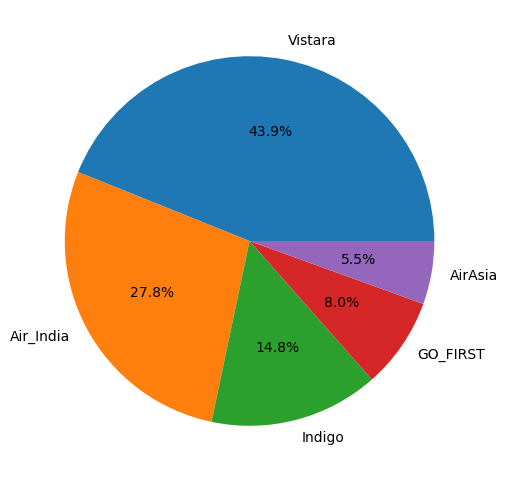

In [147]:
data_flight_airline_group = data_flight.groupby(data_flight["airline"]).count()
data_flight_airline_group_sorted = data_flight_airline_group.sort_values(by=["source_city"], ascending=False)
data_flight_airline_group_sorted

data_flight_airline_label = []
for airline in data_flight_airline_group_sorted.head(5).index:
    data_flight_airline_label.append(airline)

plt.figure(figsize=(6,6))
plt.pie(data_flight_airline_group_sorted["source_city"].head(5), labels=data_flight_airline_label, autopct="%.1f%%")
plt.show()

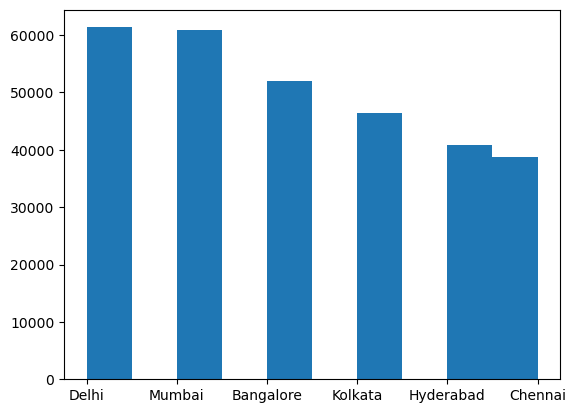

In [148]:
#Plot with top soruce cities
plt.hist(data_flight["source_city"])
plt.show()

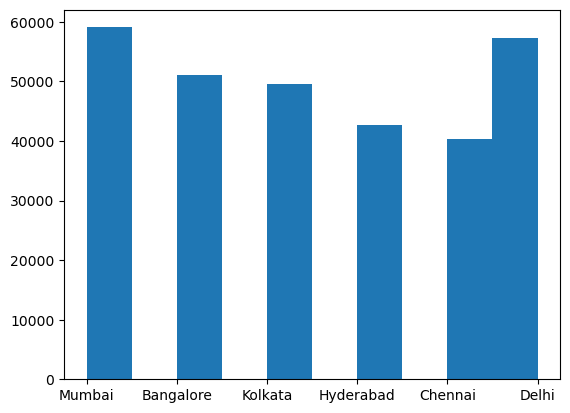

In [149]:
#plot for top destination cities
plt.hist(data_flight["destination_city"])
plt.show()

In [150]:
#Top 5 flights 
data_flight_route_group = data_flight.groupby(data_flight["destination_city"]).count()
data_flight_route_group_sorted = data_flight_route_group.sort_values(by=["source_city"], ascending=False)
data_flight_route_group_sorted.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,class,duration,days_left,price
destination_city,,,,,,,,,,,
Mumbai,59097,59097,59097,59097,59097,59097,59097,59097,59097,59097,59097
Delhi,57360,57360,57360,57360,57360,57360,57360,57360,57360,57360,57360
Bangalore,51068,51068,51068,51068,51068,51068,51068,51068,51068,51068,51068
Kolkata,49534,49534,49534,49534,49534,49534,49534,49534,49534,49534,49534
Hyderabad,42726,42726,42726,42726,42726,42726,42726,42726,42726,42726,42726


In [151]:
def dur_conv(duration):
    dur_split = re.split('[hm]', duration)
   
    dur_in_min = 0
    
    for dur in range(0,len(dur_split)):
        if dur_split[dur] != "":
            if dur == 0:
                dur_in_min = int(dur_split[dur]) * 60
            elif dur == 1:
                dur_in_min = dur_in_min + int(dur_split[dur])
    return dur_in_min

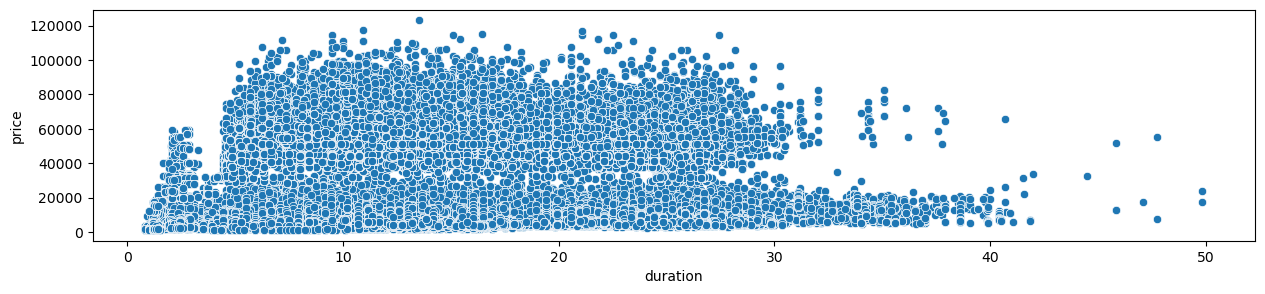

In [152]:
plt.figure(figsize=(15,3))
sns.scatterplot(x="duration", y="price", data=data_flight)
plt.show()

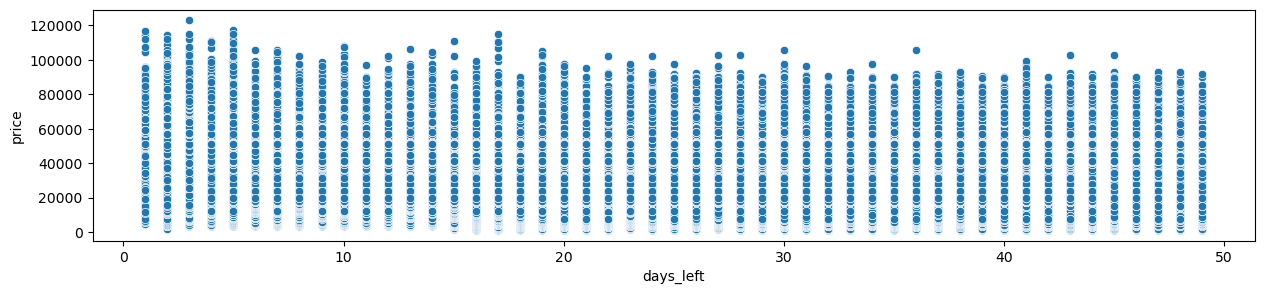

In [153]:
plt.figure(figsize=(15,3))
sns.scatterplot(x="days_left", y="price", data=data_flight)
plt.show()

In [154]:
data_flight["departure_time"] 

0               Evening
1         Early_Morning
2         Early_Morning
3               Morning
4               Morning
              ...      
300148          Morning
300149        Afternoon
300150    Early_Morning
300151    Early_Morning
300152          Morning
Name: departure_time, Length: 300153, dtype: object

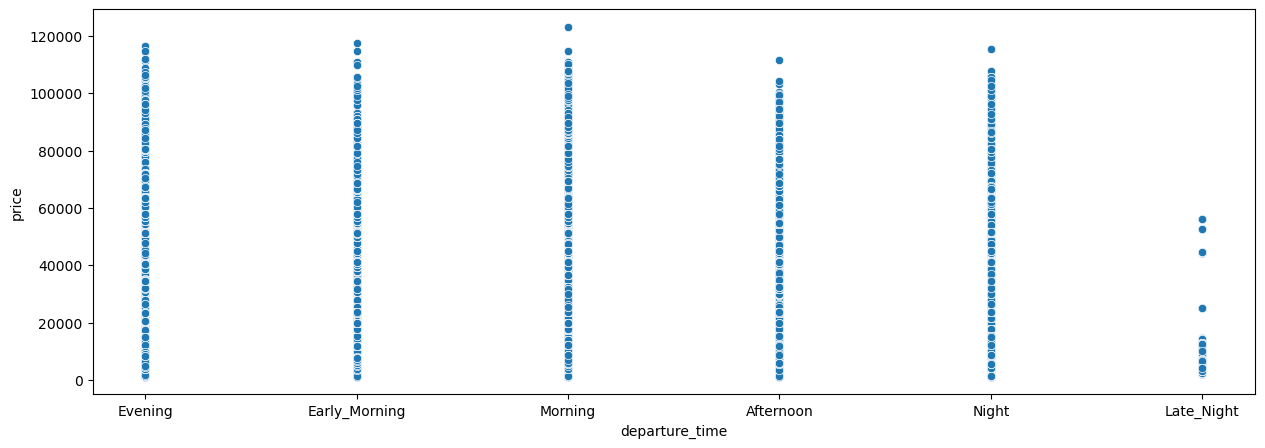

In [155]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="departure_time", y="price", data=data_flight)
plt.show()

In [156]:
def stop_conv(stop):
    if stop == "zero":
        stop = 0
    elif stop == "one":
        stop = 1
    elif stop == "two":
        stop = 2
    elif stop == "three":
        stop = 3
    else:
        stop = 0
    return stop

In [157]:
data_flight["stops"] = data_flight["stops"].apply(stop_conv)
data_flight

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10.00,49,81585


In [158]:
df = pd.DataFrame(data_flight)

# Function to convert duration to minutes
def convert_to_minutes(duration):
    hours = int(duration)
    minutes = int((duration - hours) * 100)
    total_minutes = hours * 60 + minutes
    return total_minutes

# Apply the function to the 'Duration' column
df['duration'] = df['duration'].apply(convert_to_minutes)

# Display the updated DataFrame
print(df)


        Unnamed: 0   airline   flight source_city departure_time  stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening      0   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning      0   
2                2   AirAsia   I5-764       Delhi  Early_Morning      0   
3                3   Vistara   UK-995       Delhi        Morning      0   
4                4   Vistara   UK-963       Delhi        Morning      0   
...            ...       ...      ...         ...            ...    ...   
300148      300148   Vistara   UK-822     Chennai        Morning      1   
300149      300149   Vistara   UK-826     Chennai      Afternoon      1   
300150      300150   Vistara   UK-832     Chennai  Early_Morning      1   
300151      300151   Vistara   UK-828     Chennai  Early_Morning      1   
300152      300152   Vistara   UK-822     Chennai        Morning      1   

         arrival_time destination_city     class  duration  days_left  price  
0               Nigh

In [159]:
data_flight["duration"] = data_flight["duration"]
data_flight

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,136,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,153,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,136,1,5956
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,145,1,5955
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,153,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,608,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,641,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,863,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,600,49,81585


In [160]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [161]:
data_flight["airline"] = lab_enc.fit_transform(data_flight["airline"])
data_flight["source_city"] = lab_enc.fit_transform(data_flight["source_city"])
data_flight["destination_city"] = lab_enc.fit_transform(data_flight["destination_city"])
data_flight["flight"] = lab_enc.fit_transform(data_flight["flight"])
data_flight["class"] = lab_enc.fit_transform(data_flight["class"])
data_flight["arrival_time"] = lab_enc.fit_transform(data_flight["arrival_time"])
data_flight["departure_time"] = lab_enc.fit_transform(data_flight["departure_time"])

In [162]:
data_flight.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,4,1408,2,2,0,5,5,1,136,1,5953
1,1,4,1387,2,1,0,4,5,1,153,1,5953
2,2,0,1213,2,1,0,1,5,1,136,1,5956
3,3,5,1559,2,4,0,0,5,1,145,1,5955
4,4,5,1549,2,4,0,4,5,1,153,1,5955


.


SCALING THE PREDICTOR AND VALUES

In [163]:
X = data_flight.drop(["price"], axis=1)
y = data_flight["price"]

In [164]:
from sklearn.preprocessing import MinMaxScaler # Trying min-max instead of std scaler as all values are categorical except Price

min_max_scl = MinMaxScaler()

X_scl = min_max_scl.fit_transform(X)
X_scl = pd.DataFrame(X_scl, columns = data_flight.columns[0:11])

In [165]:
data_flight_scl = pd.concat([X_scl.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
data_flight_scl

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.000000,0.8,0.902564,0.4,0.4,0.0,1.0,1.0,1.0,0.025658,0.0,5953
1,0.000003,0.8,0.889103,0.4,0.2,0.0,0.8,1.0,1.0,0.031398,0.0,5953
2,0.000007,0.0,0.777564,0.4,0.2,0.0,0.2,1.0,1.0,0.025658,0.0,5956
3,0.000010,1.0,0.999359,0.4,0.8,0.0,0.0,1.0,1.0,0.028697,0.0,5955
4,0.000013,1.0,0.992949,0.4,0.8,0.0,0.8,1.0,1.0,0.031398,0.0,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0.999987,1.0,0.946795,0.2,0.8,1.0,0.4,0.6,0.0,0.185010,1.0,69265
300149,0.999990,1.0,0.949359,0.2,0.0,1.0,1.0,0.6,0.0,0.196151,1.0,77105
300150,0.999993,1.0,0.952564,0.2,0.2,1.0,1.0,0.6,0.0,0.271101,1.0,79099
300151,0.999997,1.0,0.950641,0.2,0.2,1.0,0.4,0.6,0.0,0.182309,1.0,81585


.





SPLITING THE SCALED VALUES INTO TRAINING AND TESTING DATA

In [166]:
 from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X_scl, y, test_size=0.2, random_state=9)

.



FEATURE SELECTION

In [167]:
#VARIANCE METHOD 
from sklearn.feature_selection import VarianceThreshold as vt

var_thr = vt(threshold=0.1)
var_thr.fit(X_train)
print(var_thr.get_support())

[False  True False  True  True  True  True  True  True False False]


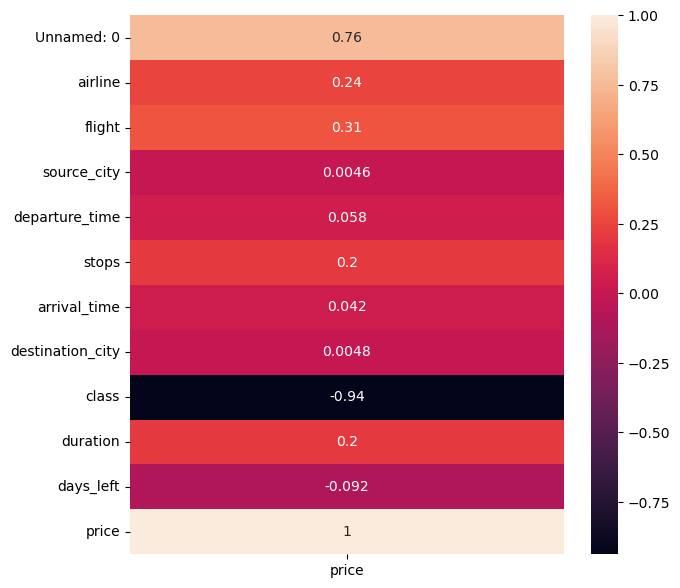

In [168]:
#CORRELATION COEFFICIENT METHOD
plt.figure(figsize=(7,7))
sns.heatmap(data_flight_scl.corr()[["price"]], annot=True)
plt.show()

In [169]:
pip install fast_ml

Note: you may need to restart the kernel to use updated packages.


In [170]:
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features

get_duplicate_features(data_flight_scl)

,Desc,feature1,feature2


In [171]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

tb_model = SelectFromModel(RandomForestRegressor(n_estimators=20, random_state=9))
tb_model.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=20,
                                                random_state=9))

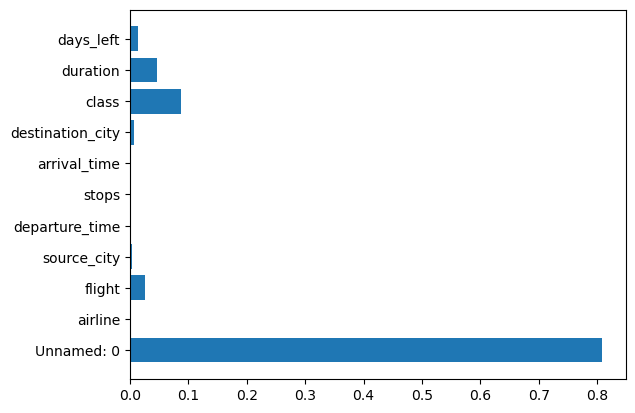

In [172]:
#FEATURE IMPORTANCE
plt.barh(X_scl.columns, tb_model.estimator_.feature_importances_)
plt.show()

.

SELECTING AND CREATING A MODEL  

In [173]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X_test_rows = X_test.shape[0]
X_test_cols = X_test.shape[1]

print(X_test.shape)
print(X_test_rows)
print(X_test_cols)

(60031, 11)
60031
11


LINEAR REGRESSION

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined

# Instantiate the linear regression model
lrm = LinearRegression()

# Training the algorithm
lrm.fit(X_train, y_train)

# Making predictions on the test set
Y_pred = lrm.predict(X_test)

# To retrieve the intercept:
print("Intercept:", lrm.intercept_)

# For retrieving the slope:
print("Coefficients:", lrm.coef_)

# Creating a DataFrame for actual and predicted values
df_lrm = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})

# Metrics for regression evaluation

# Mean Squared Error (MSE)
MSE_LR = mean_squared_error(y_test, Y_pred)
print("MSE: ", MSE_LR)

# Root Mean Squared Error (RMSE)
RMSE_LR = np.sqrt(MSE_LR)
print("RMSE: ", RMSE_LR)

# Mean Absolute Error (MAE)
MAE_LR = mean_absolute_error(y_test, Y_pred)
print("MAE: ", MAE_LR)

# R-squared (R2) Score
R2_LR = r2_score(y_test, Y_pred)
print("R2 Score: ", R2_LR)

# Calculate accuracy based on absolute percentage error
accuracy_log = 100 - np.mean(np.abs((Y_pred - y_test) / y_test) * 100)
print("Accuracy:", accuracy_log)


Intercept: 44332.90681753642
Coefficients: [ 8.87010257e+02  4.52728493e+03  6.26104252e+02  5.65788410e+02
  1.02554790e+01  4.35938189e+03  8.78781140e+02  5.65547462e+02
 -4.39566419e+04  6.97192515e+03 -6.29637460e+03]
MSE:  51528576.28401456
RMSE:  7178.340775138399
MAE:  4633.200559047056
R2 Score:  0.9007746591723618
Accuracy: 59.84717811924741


KNN

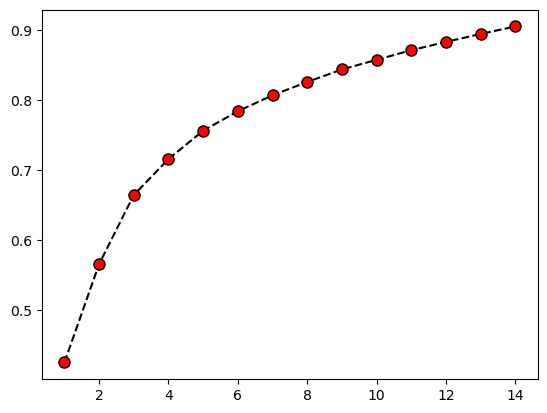

In [175]:
from sklearn.neighbors import KNeighborsRegressor

err_rate = []
for neighbor in range(1,15):
    knn_reg = KNeighborsRegressor(n_neighbors = neighbor)
    knn_reg.fit(X_train, y_train)
    y_pred_knn_reg_init = knn_reg.predict(X_test)
    err_rate.append(np.mean(y_pred_knn_reg_init != y_test))
    
plt.plot(range(1,15), err_rate, color='black', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize='8')
plt.show()

In [176]:
knn_reg_final = KNeighborsRegressor(n_neighbors=3)
knn_reg_final.fit(X_train, y_train)
y_pred_knn_reg = knn_reg_final.predict(X_test)

r2_sco_knn_reg = r2_score(y_test, y_pred_knn_reg)
print("R squared for KNN is:",r2_sco_knn_reg)

adj_r2_sco_knn_reg = 1-(1-r2_sco_knn_reg)*(X_test_rows-X_test_cols)/(X_test_rows-X_test_cols-1)
print("Adjusted R squared for KNN is:",adj_r2_sco_knn_reg)

mea_squ_err_knn_reg = mean_squared_error(y_test, y_pred_knn_reg)
print("Mean squared error for KNN is:",mea_squ_err_knn_reg)

mea_abs_err_knn_reg = mean_absolute_error(y_test, y_pred_knn_reg)
print("Mean absolute error for KNN is:",mea_abs_err_knn_reg)

accuracy_knn = 100 - np.mean(np.abs((y_pred_knn_reg - y_test) / y_test) * 100)
print("Accuracy:", accuracy_knn)

R squared for KNN is: 0.9746586236773519
Adjusted R squared for KNN is: 0.9746582014547837
Mean squared error for KNN is: 13159995.542386433
Mean absolute error for KNN is: 1661.3439667283017
Accuracy: 90.16151081693492


.


DECISION TREE

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

   # Import decision tree regression model

Rtree = DecisionTreeRegressor(criterion='friedman_mse',     # Initialize and fit regressor,The criterion parameter specifies the function that the decision tree algorithm will use to measure the quality of a split during the tree-building process. In this case, 'mse' stands for Mean Squared Error, which is a common criterion for regression problems. It measures the average squared difference between the actual target values and the predicted values. The decision tree algorithm tries to minimize this error when splitting the data.
                             max_depth=3)          #max_depth=3: The max_depth parameter defines the maximum depth of the decision tree. It limits the number of levels (or layers) in the tree. A smaller value, like 3, means that the tree will be relatively shallow, which can help prevent overfitting. Overfitting occurs when a model captures noise in the training data, making it perform poorly on new, unseen data. Setting max_depth can control the complexity of the tree.       

RT_model = Rtree.fit(X_train, y_train)

Y_pred_dt = RT_model.predict(X_test)

df_RT = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': Y_pred_dt.flatten()})

from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score

# MSE

MSE_DTR=mean_squared_error(y_test, Y_pred_dt)
print("MSE: ", mean_squared_error(y_test, Y_pred_dt))

# RMSE

RMSE_DTR=np.sqrt(mean_squared_error(y_test, Y_pred_dt))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, Y_pred_dt)))

# MAE

MAE_DTR=np.sqrt(mean_absolute_error(y_test, Y_pred_dt))
print("MAE: ", np.sqrt(mean_absolute_error(y_test, Y_pred_dt)))
      
# R2 Score
               
R2_DTR=r2_score(y_test, Y_pred_dt)
print("R2 Score: ", r2_score(y_test, Y_pred_dt))

accuracy_dt = 100 - np.mean(np.abs((Y_pred_dt - y_test) / y_test) * 100)
print("Accuracy:", accuracy_dt)



MSE:  34404457.516184606
RMSE:  5865.531307237615
MAE:  59.40572657701953
R2 Score:  0.9337494984488353
Accuracy: 72.65666366084255


.


RANDOM FOREST

In [178]:
 #creating object for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor(n_estimators= 50, random_state= 0) 
rfr.fit(X_train,y_train) 
Y_pred_rt = rfr.predict(X_test)

df_rfr = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': Y_pred_rt.flatten()})

from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score

# MSE

MSE_RFR=mean_squared_error(y_test, Y_pred_rt)
print("MSE: ", mean_squared_error(y_test, Y_pred_rt))

# RMSE

RMSE_RFR=np.sqrt(mean_squared_error(y_test, Y_pred_rt))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, Y_pred_rt)))

# MAE

MAE_RFR=np.sqrt(mean_absolute_error(y_test, Y_pred_rt))
print("MAE: ", np.sqrt(mean_absolute_error(y_test, Y_pred_rt)))
      
# R2 Score
               
R2_RFR=r2_score(y_test, Y_pred_rt)
print("R2 Score: ", r2_score(y_test, Y_pred_rt))

accuracy_rf = 100 - np.mean(np.abs((Y_pred_rt - y_test) / y_test) * 100)
print("Accuracy:", accuracy_rf)


MSE:  4691931.570030997
RMSE:  2166.086694948057
MAE:  28.107337655455616
R2 Score:  0.9909650422590716
Accuracy: 94.79430940822894


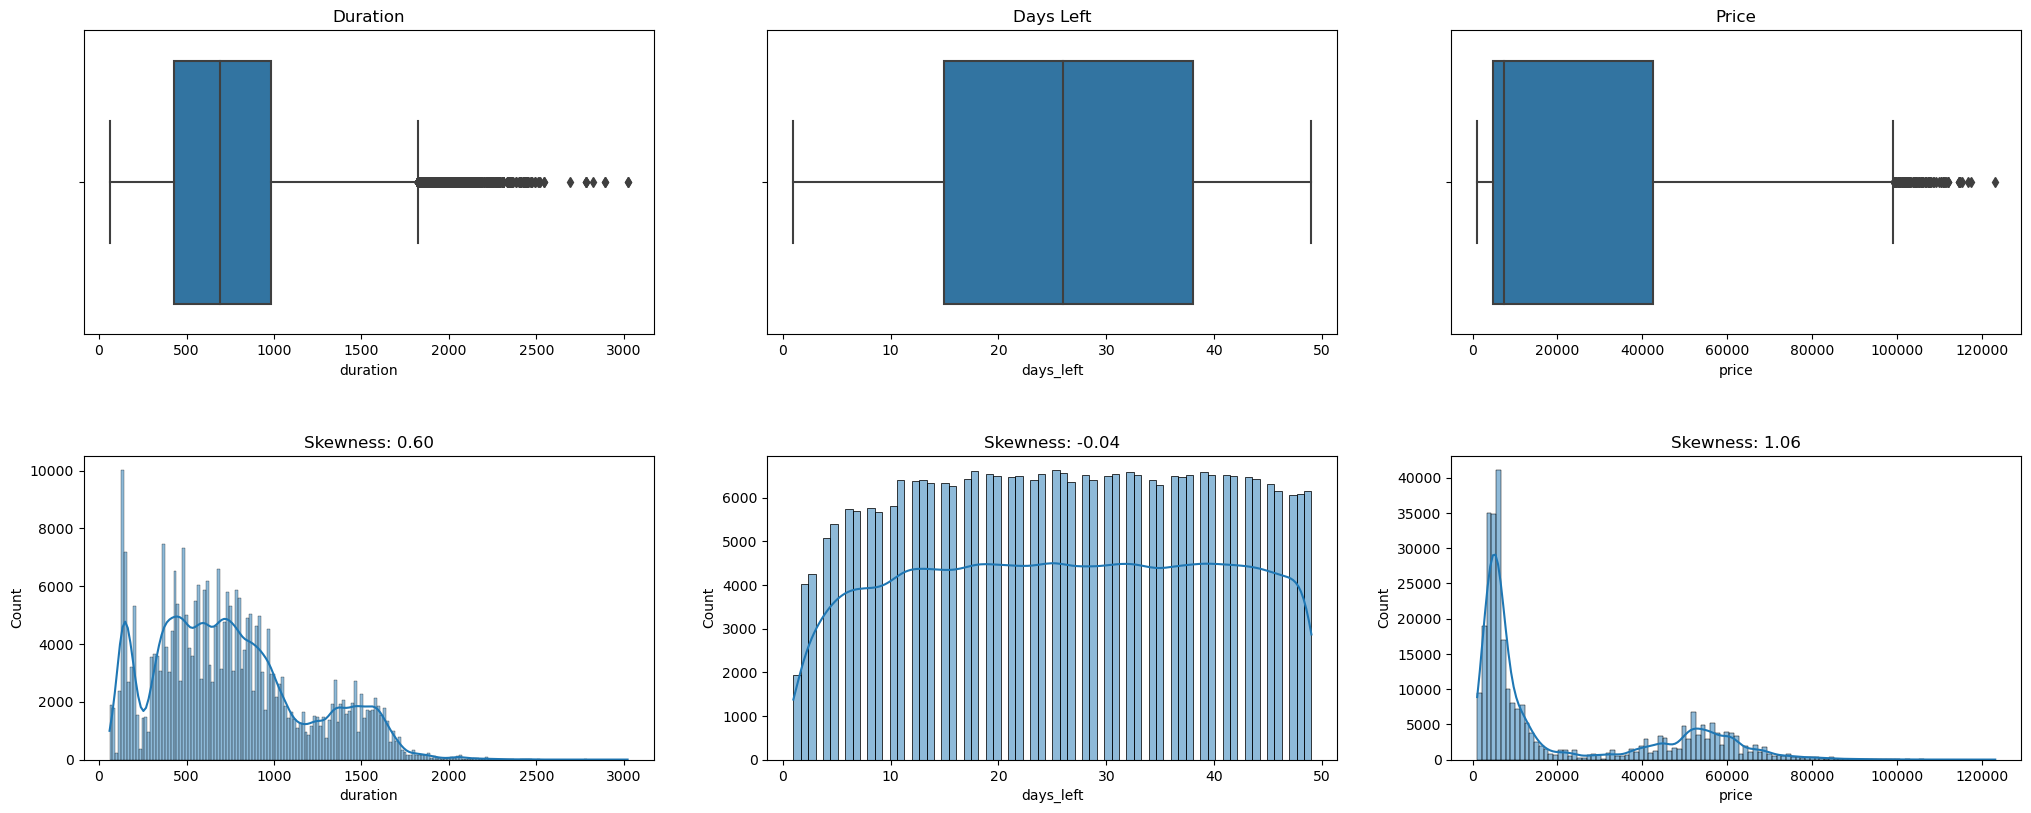

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Create a figure with subplots
plt.figure(figsize=(25, 15))

# Create a grid for subplots
grid = plt.GridSpec(3, 3, hspace=0.4)

# Subplot 1: Box Plot and Skewness Plot for Duration
plt.subplot(grid[0, 0])
sns.boxplot(x=data_flight["duration"], data=data_flight)
plt.title("Duration")

plt.subplot(grid[1, 0])
sns.histplot(data_flight["duration"], kde=True)
plt.title("Skewness: {:.2f}".format(data_flight["duration"].skew()))

# Subplot 2: Box Plot and Skewness Plot for Days Left
plt.subplot(grid[0, 1])
sns.boxplot(x=data_flight["days_left"], data=data_flight)
plt.title("Days Left")

plt.subplot(grid[1, 1])
sns.histplot(data_flight["days_left"], kde=True)
plt.title("Skewness: {:.2f}".format(data_flight["days_left"].skew()))

# Subplot 3: Box Plot and Skewness Plot for Price
plt.subplot(grid[0, 2])
sns.boxplot(x=data_flight["price"], data=data_flight)
plt.title("Price")

plt.subplot(grid[1, 2])
sns.histplot(data_flight["price"], kde=True)
plt.title("Skewness: {:.2f}".format(data_flight["price"].skew()))

plt.show()


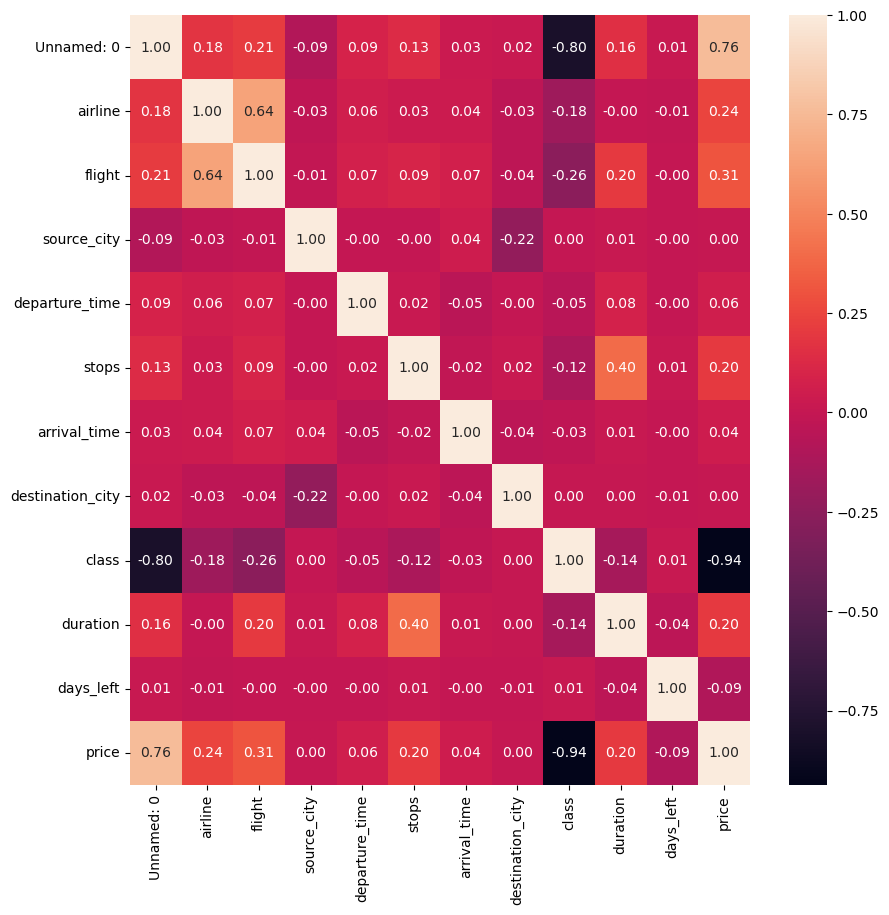

In [180]:
plt.figure(figsize=(10,10))
sns.heatmap(data_flight.corr(), annot = True, fmt=".2f")
plt.show()

In [182]:
models = ["LOGISTIC REGRESSION", "KNN", "DECISION TREE", "RANDOM FOREST"]
MSE = [mea_squ_err_lin_reg, mea_squ_err_knn_reg, mean_squared_error(y_test, Y_pred_dt), mean_squared_error(y_test, Y_pred_rt)]
RMSE = [np.sqrt(mean_squared_error(y_test, Y_pred)), adj_r2_sco_knn_reg, np.sqrt(mean_squared_error(y_test, Y_pred_dt)), np.sqrt(mean_squared_error(y_test, Y_pred_rt))]
MAE = [mea_abs_err_lin_reg, mea_abs_err_knn_reg, np.sqrt(mean_absolute_error(y_test, Y_pred_dt)), np.sqrt(mean_absolute_error(y_test, Y_pred_rt))]
R2 = [r2_sco_lin_reg, r2_sco_knn_reg, r2_score(y_test, Y_pred_dt), r2_score(y_test, Y_pred_rt)]
Accuracy = [accuracy_log, accuracy_knn, accuracy_dt, accuracy_rf]

# Create a DataFrame to display the results with indexing starting from 1 and labeled as 'Model no.'
results = pd.DataFrame({
    'Model': models,
    'MSE': MSE,
    'RMSE': RMSE,
    'MAE': MAE,
    'R Squared': R2,
    'Accuracy' : Accuracy
}, index=range(1, len(models) + 1))  # Start indexing from 1

# Rename the index column to 'Model no.'
results.index.name = 'Model no.'

# Function to highlight minimum MSE, RMSE, MAE, and maximum R-squared values and make the font bold
def highlight_min_max(val):
    style = ''
    if isinstance(val, (int, float)):
        if val == results['MSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['RMSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['MAE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['R Squared'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
        if val == results['Accuracy'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
    return style

# Apply the highlight_min_max function to the entire DataFrame
styled_results = results.style.applymap(highlight_min_max)

# Display the styled results DataFrame
styled_results

,Model,MSE,RMSE,MAE,R Squared,Accuracy
Model no.,,,,,,
1,LOGISTIC REGRESSION,51528576.284015,7178.340775,4633.200559,0.900775,59.847178
2,KNN,13159995.542386,0.974658,1661.343967,0.974659,90.161511
3,DECISION TREE,34404457.516185,5865.531307,59.405727,0.933749,72.656664
4,RANDOM FOREST,4691931.570031,2166.086695,28.107338,0.990965,94.794309
